<a href="https://colab.research.google.com/github/Ramay7/GNNs/blob/master/iclr2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install openreview-py seaborn qgrid

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import openreview
from collections import Counter, defaultdict as dd
import numpy as np
import pandas as pd
import qgrid
from pprint import pprint
import datetime
import pickle
import re 
import time
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict as ddict 

sns.set(rc={'figure.figsize':(20,8.27)}, font_scale=2)

In [0]:
paper_URL = 'ICLR.cc/2020/Conference/-/Blind_Submission'
decision_URL = 'ICLR.cc/2020/Conference/Paper.*/-/Decision'
review_URL = 'ICLR.cc/2020/Conference/Paper.*/-/Official_Review'

def get_notes(url):
    client = openreview.Client(baseurl='https://openreview.net')
    iterator = openreview.tools.iterget_notes(client, invitation=url)
    notes = ddict(list)
    for i in iterator:
        notes[i.forum].append(i)
    return notes

papers = get_notes(paper_URL)
decisions = get_notes(decision_URL)
reviews = get_notes(review_URL)

def rate(review):
    return re.findall('\d+', review.content['rating'])[0]

def merge_info(papers, decisions, reviews):
    seq = []
    for forum in papers:
        paper = papers[forum]
        decision = decisions[forum]
        review = reviews[forum]
        
        assert len(paper) == 1, 'there are more than 1 paper'
        assert len(decision) == 1, 'there are more than 1 decision'
        p = paper[0]
        title = p.content['title']
        url = "https://openreview.net/forum?id=" + forum
        d = decision[0]
        final_decision = d.content['decision']
        rates = [rate(r) for r in review]
        avg_rate = '{:.2f}'.format(np.mean([int(r) for r in rates]))
        seq.append([title, url, final_decision, avg_rate, rates])
    df = pd.DataFrame(seq)
    df.columns = ['title', 'url', 'decision', 'avg_rating', 'ratings']
    return df
    
        

iclr_results = merge_info(papers, decisions, reviews)
graph_papers = iclr_results[iclr_results['title'].str.contains('graph', case=False)]

In [0]:
id = 'BJlZ5ySKPH'
papers['BJlZ5ySKPH'][0].__dict__

{'cdate': 1569439624964,
 'content': {'_bibtex': '@inproceedings{\nKim2020U-GAT-IT:,\ntitle={U-GAT-IT: Unsupervised Generative Attentional Networks with Adaptive Layer-Instance Normalization for Image-to-Image Translation},\nauthor={Junho Kim and Minjae Kim and Hyeonwoo Kang and Kwang Hee Lee},\nbooktitle={International Conference on Learning Representations},\nyear={2020},\nurl={https://openreview.net/forum?id=BJlZ5ySKPH}\n}',
  'abstract': 'We propose a novel method for unsupervised image-to-image translation, which incorporates a new attention module and a new learnable normalization function in an end-to-end manner. The attention module guides our model to focus on more important regions distinguishing between source and target domains based on the attention map obtained by the auxiliary classifier. Unlike previous attention-based method which cannot handle the geometric changes between domains, our model can translate both images requiring holistic changes and images requiring lar

In [0]:
# use qgrid for interaction with dataframe (filtering, sorting, etc.)
# does not work in google colab, open notebook locally
qgrid.show_grid(graph_papers, show_toolbar=True,
                grid_options={
                    'forceFitColumns': True, 
                    'fullWidthRows': False, 
                    'enableColumnReorder': True,
                    'editable': True})
pd.options.display.max_rows = 500
graph_papers.sort_values(by='avg_rating', ascending=False)

,title,url,decision,avg_rating,ratings
1445,The Logical Expressiveness of Graph Neural Net...,https://openreview.net/forum?id=r1lZ7AEKvB,Accept (Spotlight),8.00,"[8, 8, 8]"
1651,Hyper-SAGNN: a self-attention based graph neur...,https://openreview.net/forum?id=ryeHuJBtPH,Accept (Poster),8.00,"[8, 8]"
1615,On the Equivalence between Node Embeddings and...,https://openreview.net/forum?id=SJxzFySKwH,Accept (Poster),7.33,"[8, 8, 6]"
2175,LambdaNet: Probabilistic Type Inference using ...,https://openreview.net/forum?id=Hkx6hANtwH,Accept (Poster),7.33,"[6, 8, 8]"
407,Directional Message Passing for Molecular Graphs,https://openreview.net/forum?id=B1eWbxStPH,Accept (Spotlight),7.33,"[8, 8, 6]"
1029,What graph neural networks cannot learn: depth...,https://openreview.net/forum?id=B1l2bp4YwS,Accept (Poster),7.33,"[6, 8, 8]"
1768,Graph Neural Networks Exponentially Lose Expre...,https://openreview.net/forum?id=S1ldO2EFPr,Accept (Spotlight),7.33,"[8, 6, 8]"
129,Physics-aware Difference Graph Networks for Sp...,https://openreview.net/forum?id=r1gelyrtwH,Accept (Poster),7.33,"[6, 8, 8]"
141,GLAD: Learning Sparse Graph Recovery,https://openreview.net/forum?id=BkxpMTEtPB,Accept (Poster),7.33,"[8, 8, 6]"
572,GraphZoom: A Multi-level Spectral Approach for...,https://openreview.net/forum?id=r1lGO0EKDH,Accept (Talk),7.33,"[6, 8, 8]"


In [0]:
graph_papers['accepted'] = graph_papers.decision.str.contains('accept', case=False)


In [0]:
print(graph_papers.accepted.value_counts())
print('Mean average rating', graph_papers.avg_rating.apply(lambda x: float(x)).mean())
print('Mean average rating for accept', graph_papers[graph_papers.accepted].avg_rating.apply(lambda x: float(x)).mean())
print('Mean average rating for reject', graph_papers[~graph_papers.accepted].avg_rating.apply(lambda x: float(x)).mean())

False    103
True      49
Name: accepted, dtype: int64
Mean average rating 4.570394736842107
Mean average rating for accept 6.258775510204081
Mean average rating for reject 3.767184466019417


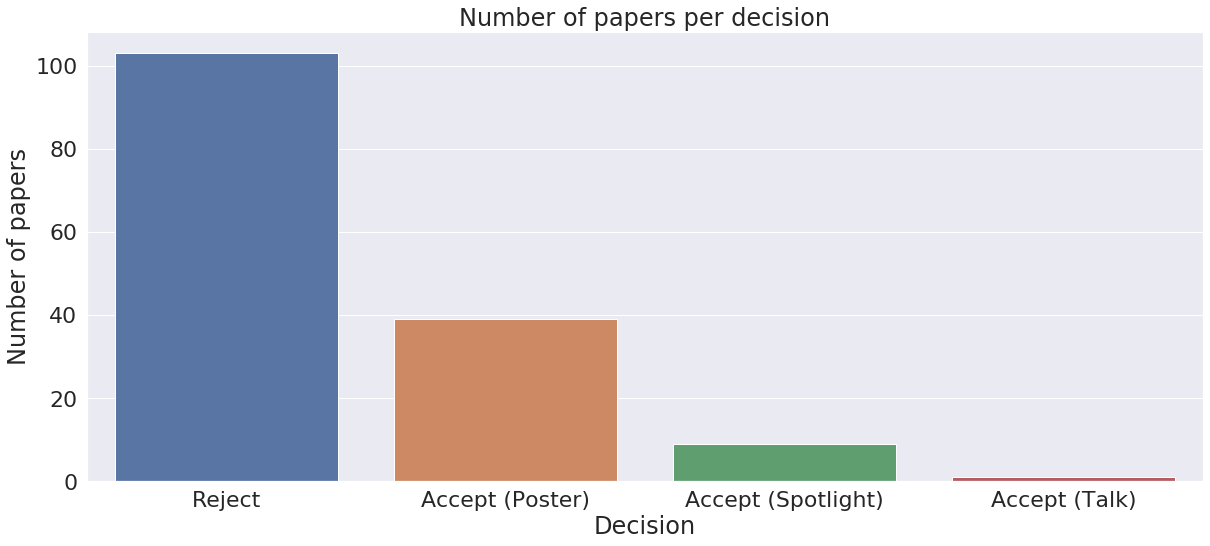

In [0]:
graph_papers.decision = pd.Categorical(graph_papers.decision, categories=['Reject', 'Accept (Poster)', 'Accept (Spotlight)', 'Accept (Talk)'], ordered=True)
sns.countplot(graph_papers.decision)
plt.xlabel('Decision')
plt.ylabel('Number of papers')
_ = plt.title('Number of papers per decision')
# graph_papers.decision.value_counts().plot('bar')

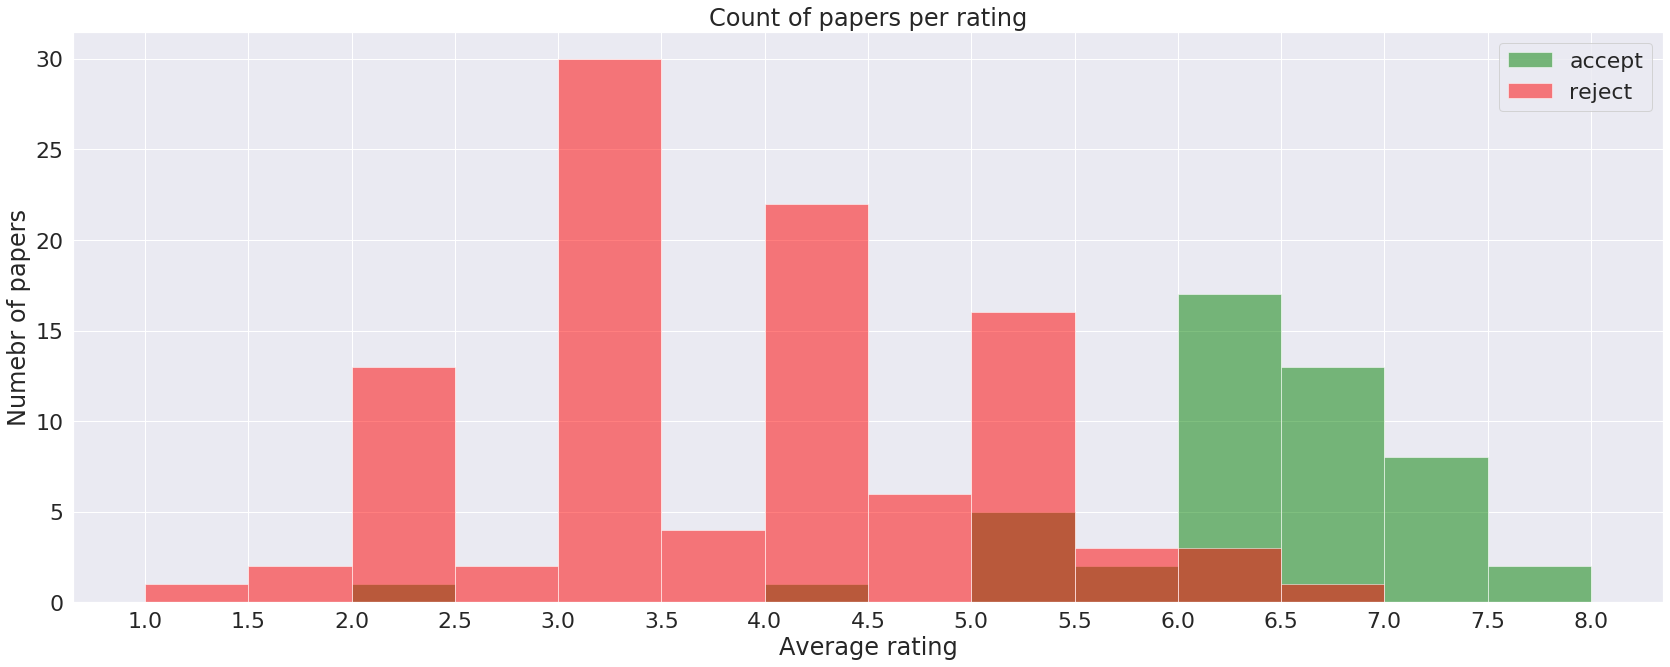

In [0]:
x = graph_papers[graph_papers.accepted].avg_rating
y = graph_papers[~graph_papers.accepted].avg_rating
fig = plt.gcf()
fig.set_size_inches(28.5, 10.5)
bins = np.arange(1,8.1, 0.5)
plt.hist(x, alpha=0.5, bins=bins, label='accept', color='green')
plt.hist(y, alpha=0.5, bins=bins, label='reject', color='red')
plt.legend()
plt.xlabel('Average rating')
plt.ylabel('Numebr of papers')
plt.title('Count of papers per rating')
_ = plt.xticks(bins)